# Planet transit simulations

Here we try to plot an exoplanet transit spectrum.

In [1]:
# %load ~/Desktop/defaults.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import astropy.units as u

### Get exoplanet transit spectrum

We can use Caroline Morley's models from [her website](https://www.carolinemorley.com/models).  We want:

"MORLEY ET AL. 2015: SUB-NEPTUNE MODELS INCLUDING THE EFFECTS OF CLOUDS AND HAZES"
> Models of GJ 1214b “analogs” from Morley et al. 2015, including cloudy, hazy, and cloud-free models. These include thermal emission, transmission, and albedo spectra. Other similar models available upon request. 

Let's read in the transmission spectra data.

In [3]:
#! cat ../data/Morley2015_models/published_models/_README.txt

In [4]:
! ls ../data/Morley2015_models/published_models/emission_spectra/cloud-free/

gj1214-1000x-0.3x-nc.spec gj1214-150x-1x-nc.spec    gj1214-300x-0.3x-nc.spec
gj1214-1000x-10x-nc.spec  gj1214-150x-3x-nc.spec    gj1214-300x-10x-nc.spec
gj1214-1000x-1x-nc.spec   gj1214-200x-0.3x-nc.spec  gj1214-300x-1x-nc.spec
gj1214-1000x-3x-nc.spec   gj1214-200x-10x-nc.spec   gj1214-300x-3x-nc.spec
gj1214-100x-0.3x-nc.spec  gj1214-200x-1x-nc.spec    gj1214-50x-0.3x-nc.spec
gj1214-100x-10x-nc.spec   gj1214-200x-3x-nc.spec    gj1214-50x-10x-nc.spec
gj1214-100x-1x-nc.spec    gj1214-250x-0.3x-nc.spec  gj1214-50x-1x-nc.spec
gj1214-100x-3x-nc.spec    gj1214-250x-10x-nc.spec   gj1214-50x-30x-nc.spec
gj1214-150x-0.3x-nc.spec  gj1214-250x-1x-nc.spec    gj1214-50x-3x-nc.spec
gj1214-150x-10x-nc.spec   gj1214-250x-3x-nc.spec


The file names describe the contents.
> cloud-free:
gj1214-METALLICITY-INCIDENTFLUX-nc.[[append]]
e.g. gj1214-50x-0.3x-nc.spec is 50x solar, 0.3x GJ 1214b's
	incident flux, and cloud-free, emission spectrum. 

In [5]:
! head ../data/Morley2015_models/published_models/transmission_spectra/cloud-free/gj1214-100x-1x-nc.out

wavelength (microns) 	 radius (km) 
      30.0000   17201.5230     
      29.9911   17065.3259     
      29.9822   17110.6001     
      29.9733   17276.7692     
      29.9644   17066.4351     
      29.9555   17084.3500     
      29.9466   17123.8913     
      29.9377   17213.5251     
      29.9289   17356.1280     


In [6]:
fn = '../data/Morley2015_models/published_models/transmission_spectra/cloud-free/gj1214-100x-1x-nc.out'
df_raw = pd.read_csv(fn, delim_whitespace=True, names=['wl_um', 'radius_km'], skiprows=1)

In [7]:
df_raw.head()

,wl_um,radius_km
0,30.0000,17201.5230
1,29.9911,17065.3259
2,29.9822,17110.6001
3,29.9733,17276.7692
4,29.9644,17066.4351


In [17]:
nir_bounds = (df_raw.wl_um > 1.15) & (df_raw.wl_um < 2.45)
df = df_raw#[nir_bounds].copy()
df = df.reset_index(drop=True)

In [18]:
R_scale = u.km/u.earthRad

In [19]:
df['radius_earth'] = df.radius_km * R_scale.to(u.dimensionless_unscaled)

In [20]:
R_GJ1215 = 0.2064 #R_sun

The peak transit depth is:

transit_depth = $\frac{R^2_{\mathrm{planet}}}{R^2_\star} $

In [21]:
df['radius_Rstar'] = df.radius_km*(u.km/(R_GJ1215*u.solRad)).to(u.dimensionless_unscaled)

In [22]:
df['transit_depth'] = df.radius_Rstar**2

In [23]:
df.head()

,wl_um,radius_km,radius_earth,radius_Rstar,transit_depth
0,30.0000,17201.5230,2.696967,0.119794,0.014351
1,29.9911,17065.3259,2.675613,0.118846,0.014124
2,29.9822,17110.6001,2.682711,0.119161,0.014199
3,29.9733,17276.7692,2.708764,0.120318,0.014476
4,29.9644,17066.4351,2.675787,0.118853,0.014126


In [29]:
import seaborn as sns

In [32]:
sns.set_context('poster')

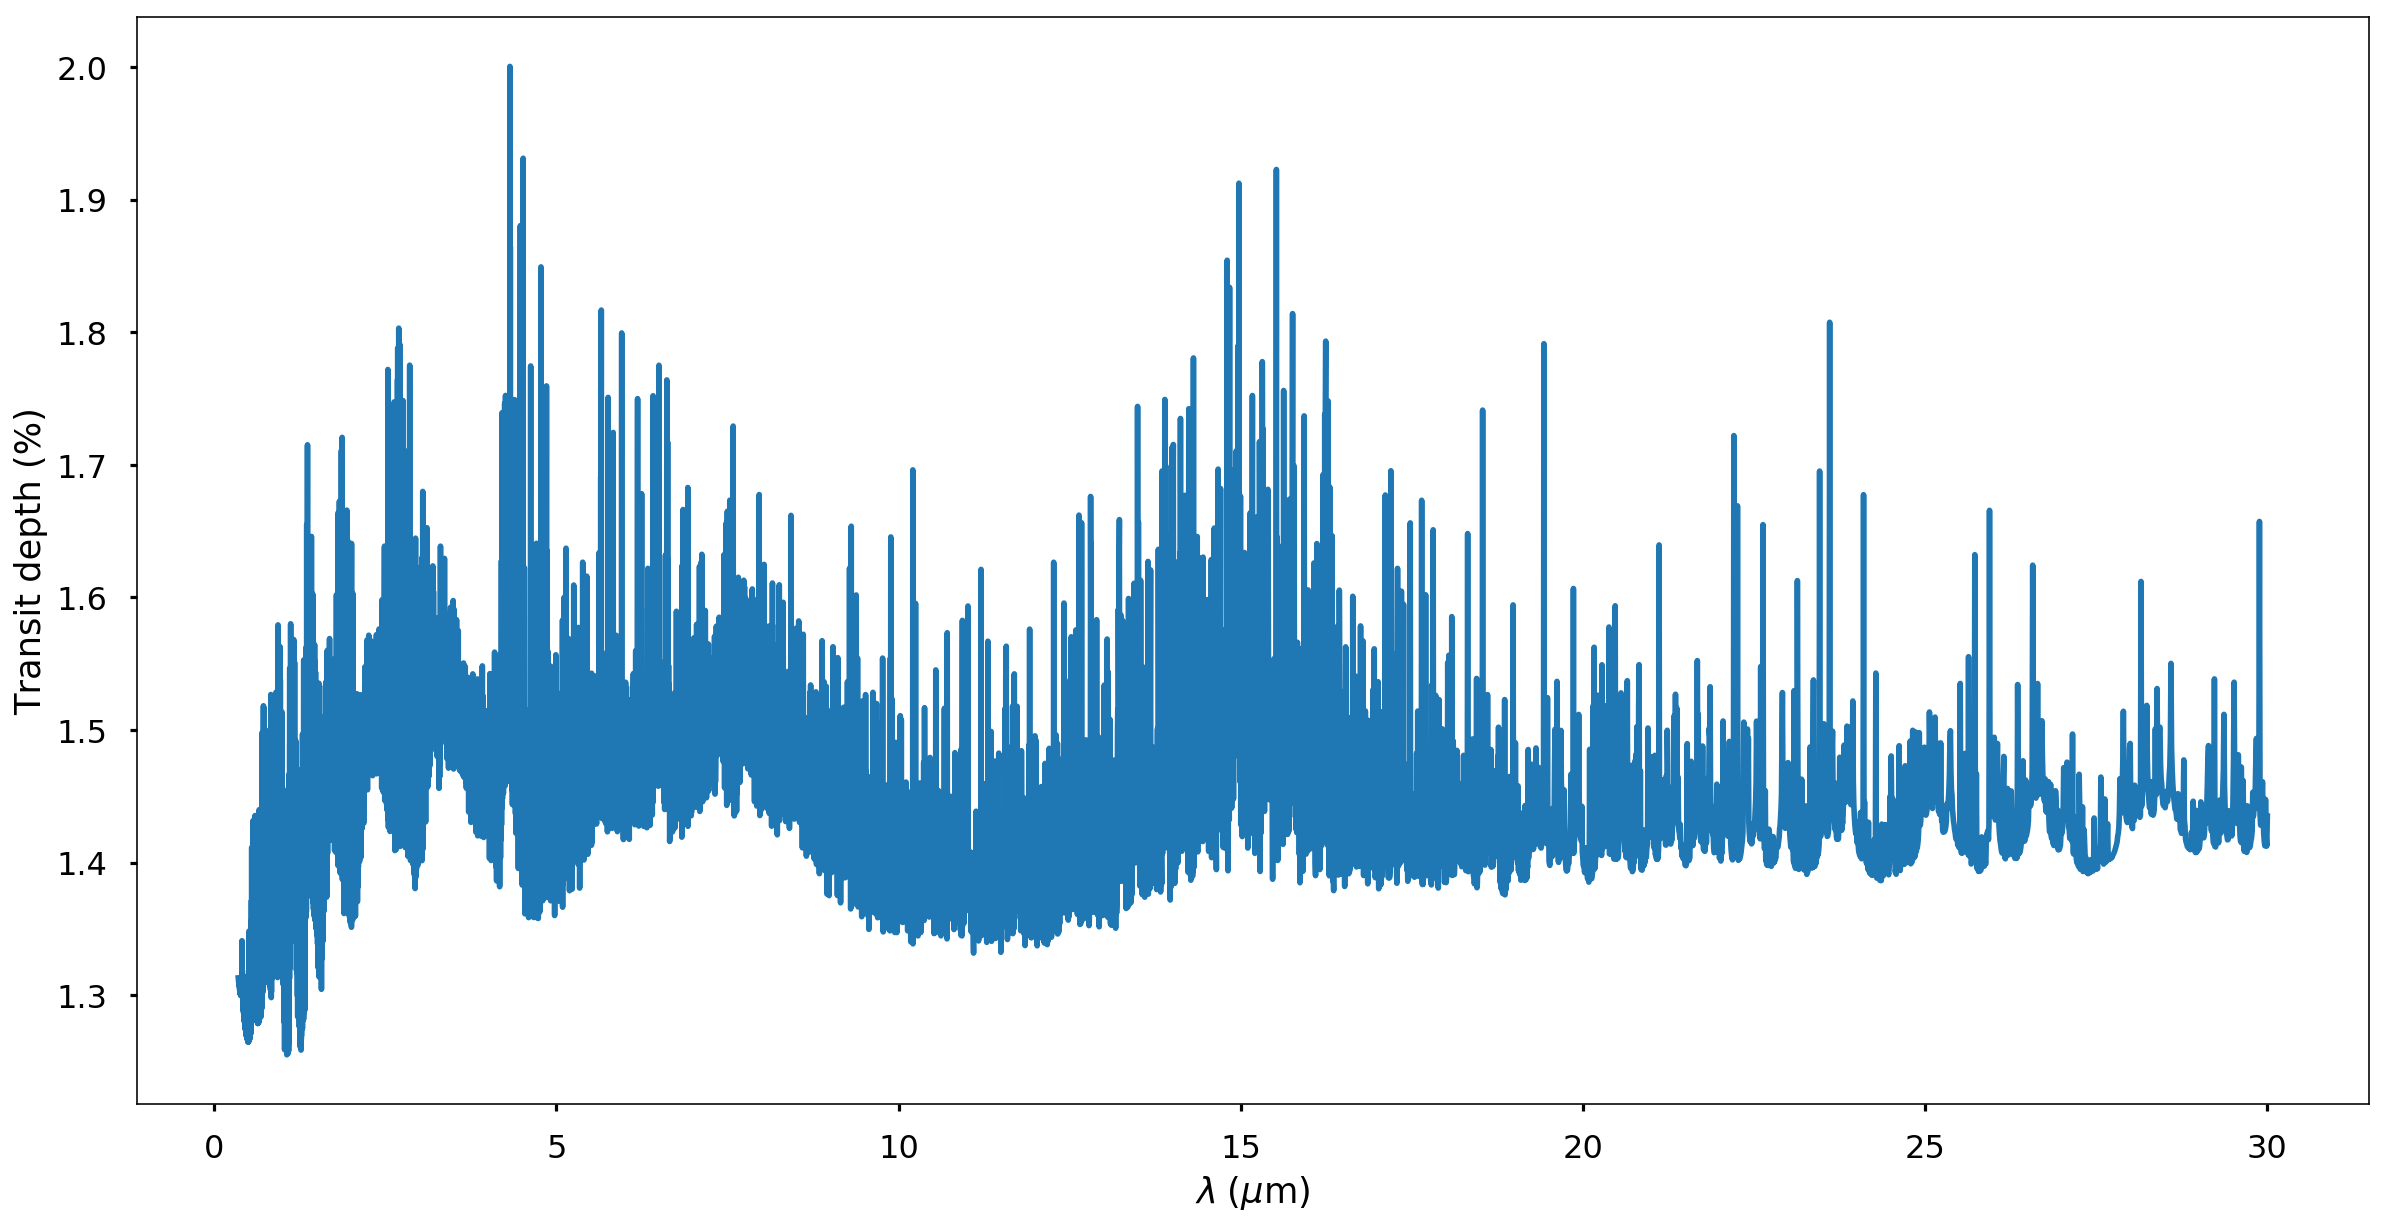

In [33]:
plt.figure(figsize=(20,10))
plt.plot(df.wl_um, df.transit_depth*100.0)
plt.xlabel('$\lambda \;(\mu \mathrm{m})$')
plt.xlabel('$\lambda \;(\mu \mathrm{m})$')
plt.ylabel('Transit depth (%)')

In [25]:
df.transit_depth.std()

0.0008709565202580554

Neat!